# Clasificador Naive Bayes

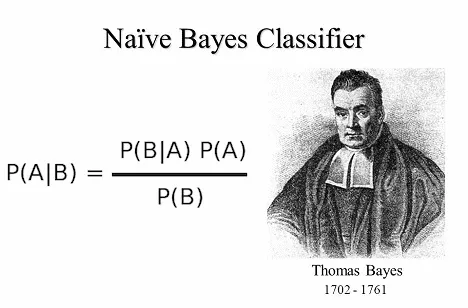

En aprendizaje autom치tico y ciencia de datos, *Na칦ve Bayes* es un algoritmo simple pero ampliamente utilizado. Este es un algoritmo clasificador basado en **probabilidad**. La base de este modelo es el teorema de Bayes:

$P(C \mid x) = \frac{P(x \mid C) \cdot P(C) }{ P(x) }$


Donde,

* $P(C \mid x)$: Probabilidad posterior de ocurrencia del evento (clase) $C$, dada la observaci칩n $x$
* $P(x \mid C)$: Probabilidad de observar $x$ si $C$ es verdad
* $P(C)$: Probabilidad de observar $C$
* $P(x)$: Probabilidad de observar $x$


En pocas palabras, el clasificador *Na칦ve Bayes* clasifica una instancia calculando el **posterior** de cada clase, dada la instancia; $P(C \mid x)$, asignando la predicci칩n a la clase con el mayor posterior. En la pr치ctica, la probabilidad posterior puede ser complicada de calcular, por lo tanto se hacen algunas (arriegadas) suposiciones, de ah칤 el nombre: **Na칦ve** *Bayes*.

Para adquirir mayor conocimiento de como funciona, puedes ver los siguientes v칤deos:
* [Multinomial Naive Bayes](https://www.youtube.com/watch?v=O2L2Uv9pdDA) para probabilidades discretas
* [Gaussian Naive Bayes](https://www.youtube.com/watch?v=H3EjCKtlVog) para probabilidades continuas

## Carga y preparaci칩n de datos
Utilizaremos el famoso conjunto de datos de *iris*. Comenzaremos por dividir los datos en conjuntos de *entrenamiento* (70%) y *prueba* (30%).

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
train = df.sample(frac = 0.7, random_state = 1)
test = df.drop(train.index)

y_train = train["class"]
x_train = train.drop("class", axis = 1)

y_test = test["class"]
x_test = test.drop("class", axis = 1)
print('Dimensiones de datos de prueba', x_test.shape,'\nDimensiones de datos de entrenamiento', x_train.shape)

Dimensiones de datos de prueba (45, 4) 
Dimensiones de datos de entrenamiento (105, 4)


## Entrenamiento del modelo
Entrenar un modelo de Na칦ve Bayes es muy simple. Pero antes de llegar all칤, debemos establecer la distribuci칩n en la que basamos las probabilidades. Recordemos el Teorema de Bayes:

$P(C \mid x) = \frac{P(x \mid C) \cdot P(C) }{ P(x) }$


Donde,

* $P(C \mid x)$: Probabilidad posterior de ocurrencia del evento (clase) $C$, dada la observaci칩n $x$
* $P(x \mid C)$: Probabilidad de observar $x$ si $C$ es verdad
* $P(C)$: Probabilidad de observar $C$
* $P(x)$: Probabilidad de observar $x$

Para encontrar las probabilidades *a posteriori* $P(C \mid x)$, necesitamos calcular la probabilidad $P(x \mid C)$ y el *a priori* $P(C)$.

Podemos obtener esta probabilidad si conocemos la distribuci칩n de $x$. Comunmente se asume una distribuci칩n gaussiana (normal) para todas las clases, ya que es una buena aproximaci칩n para muchas otras distribuciones.

La distribuci칩n normal requiere dos par치metros: $\mu$ y $\sigma^2$. Dado que no conocemos los valores reales de estos par치metros debemos estimarlos a partir de las muestras actuales.

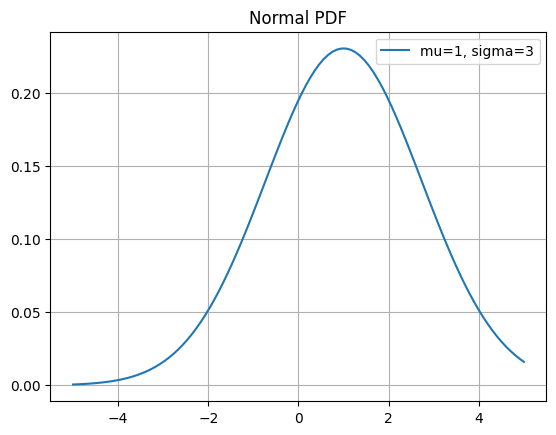

In [ ]:
import matplotlib.pyplot as plt

def normalpdf(n, mu=0, sigma=1):
    # Funcion para estimar PDF (Probability Density Function) dado que hay una distribucion Normal(mu, var) evaluado con x
    sd = np.sqrt(sigma)
    pdf = (np.e ** (-0.5 * ((n - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    return pdf


# Define the parameters of the Gaussian function
mu = 1  # mean
sigma = 3  # standard deviation

xs = np.linspace(-5, 5, 100)
ys = normalpdf(xs, mu, sigma)

# Generate plot
plt.title('Normal PDF')
plt.plot(xs, ys, label = 'mu='+str(mu)+', sigma='+str(sigma))
plt.legend() # incluir label
plt.grid(True)
plt.show()

## C치lculo de probabilidad apriori
Tambi칠n necesitamos encontrar la probabilidad previa $P(C)$. Estimaremos la probabilidad previa de una clase $C$ contando todas las ocurrencias de la clase $C$ y dividi칠ndola por el n칰mero total de muestras.

Tambi칠n hay un $P(x)$ en la f칩rmula, que no necesita ser calculado. Llegaremos a la raz칩n de esto m치s adelante.

IMPORTANTE: Todos estos calculos se realizan solo en los datos de entrenamiento.

In [ ]:
means = train.groupby(["class"]).mean() # Estimacion de la media de cada clase, por caracter칤stica
var = train.groupby(["class"]).var() # Estimacion de la varianza de cada clase, por caracter칤stica
prior = (train.groupby("class").count() / len(train)).iloc[:,1] # Estimacion probabilidades a priori P(C)
clases = np.unique(train["class"].tolist()) # Todas las clases posibles

print('Estimacion de la media de cada clase, por caracter칤stica:\n', means)
print('\nEstimacion de la varianza de cada clase, por caracter칤stica\n', var)
print('\nEstimacion probabilidades a priori\n', prior)

Estimacion de la media de cada clase, por caracter칤stica:
                  sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa          5.084848     3.493939      1.457576     0.248485
Iris-versicolor      5.925714     2.785714      4.268571     1.325714
Iris-virginica       6.718919     2.989189      5.632432     2.056757

Estimacion de la varianza de cada clase, por caracter칤stica
                  sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa          0.132576     0.176212      0.024394     0.010076
Iris-versicolor      0.234319     0.085378      0.196924     0.033143
Iris-virginica       0.366577     0.116547      0.337808     0.060856

Estimacion probabilidades a priori
 class
Iris-setosa        0.314286
Iris-versicolor    0.333333
Iris-virginica     0.352381
Name: sepal width, dtype: float64


Ahora tenemos todo lo que necesitamos para calcular la probabilidad posterior $P(C\mid x)$. Con esto concluye el proceso de entrenamiento.

$ $

# Clasificaci칩n
El proceso de clasificaci칩n en un clasificador (Gaussian) **Na칦ve Bayes** se realiza calculando el *posterior* para todas las clases dados los datos actuales.
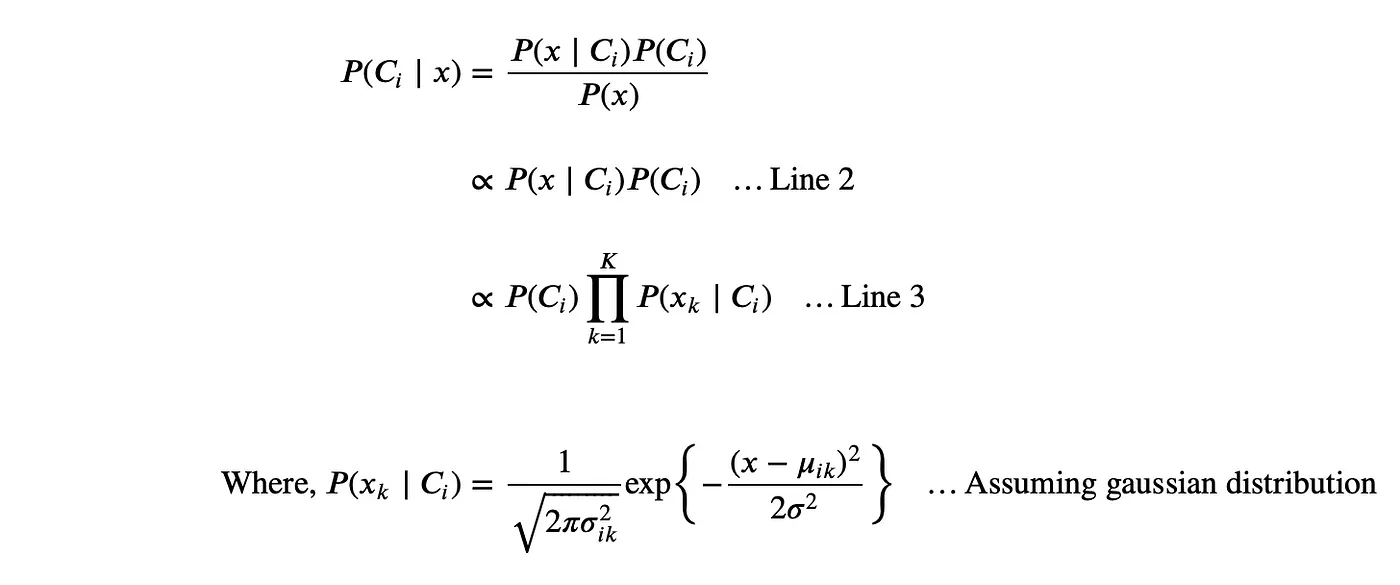

Nota: $\propto$ es aqu칤 un s칤mbolo que se lee como "proporcional a".

Algunos comentarios:
1. L칤nea 2: se "deshecha" $P(x)$. Esto se debe a que la probabilidad de observar $x$ es la misma en todas las clases. Esto no afectar치 el c치lculo porque no necesitamos encontrar la probabilidad posterior real de las clases. En cambio, solo necesitamos ver qu칠 clase tiene la mayor probabilidad posterior. Dividir todas las probabilidades posteriores por la misma constante devolver칤a los mismos resultados sobre cu치l es el valor m치s grande.
2. L칤nea 3: $P(x \mid C)$ se expande para denotar todas las dimensiones (columnas) de cada patr칩n (vector). La expresi칩n inicial $P(x \mid C)$ es la probabilidad de observar $x$ (i.e., la fila completa), dada la clase actual ($C_i$). Esta versi칩n ampliada calcula la probabilidad de cada caracter칤stica (columna) del patr칩n (fila) y clase $C_i$ (datos individuales) asumiendo una distribuci칩n normal.

## El "problema" con Naive Bayes
Si est치s familiarizado con probabilidades, puede que notes algo falaz en la expansi칩n de la l칤nea 3. Aqu칤 est치 el desglose de la misma:

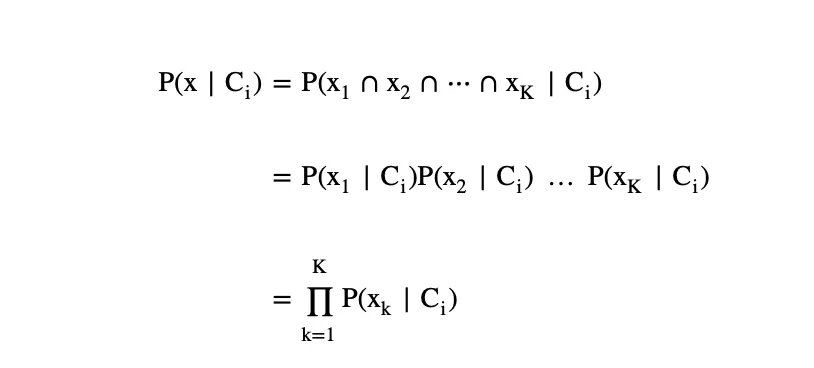

He aqu칤 donde muchos entusiastas de las matem치ticas y estad칤stica pueden "levantar la ceja" o exclamar...

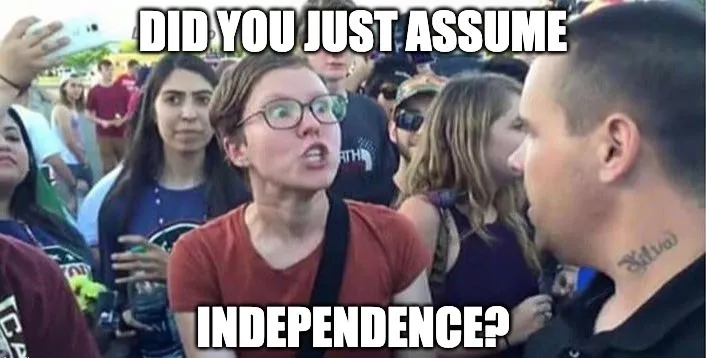

Esta es una suposici칩n esencial del modelo Naive Bayes: asumir que todas las caracter칤sticas son independientes entre s칤. En pr치ctica esto no sucede a menudo (y de ah칤 su nombre *Naive* Bayes) pero ha funcionado muy bien y por tanto, ha alcanzado una gran aceptaci칩n en la comunidad de ML
 游뗵.

## Ajuste logar칤tmico por Underflow
Volviendo al punto de clasificaci칩n, para calcular la probabilidad posterior $P(C_i\mid x)$ se suele sustituir la expresi칩n original:

$P(C_i\mid x) \propto P(C_i)\prod_{k=1}^{K}P(x_k \mid C_i)$

por la siguiente expresi칩n:


$\log P(C_i\mid x) \propto \log P(C_i) + \sum_{k=1}^{K} \log P(x_k \mid C_i)$


La raz칩n de este cambio es realizar un ajuste para tomar en cuenta un problema potencial que puede suceder cuando se trabaja con cantidades muy "peque침as" (e.g., probabilidades). En pocas palabras, al multiplicar cantidades peque침as se puede tener como resultado valores demasiado peque침os para ser almacenados apropiadamente en memoria ([leer sobre Underflow](https://datascience.stackexchange.com/questions/80363/reduce-the-risk-of-numerical-underflow)).

Para mitigar este problema, el ajuste por desbordamiento toma el logaritmo de las probabilidades y realiza una suma en lugar de una multiplicaci칩n. Al trabajar con logaritmos, probabilidades "peque침as" se transforman en valores m치s manejables, lo que reduce el riesgo de desbordamiento.

* Nota 1: Recuerda que $\log(ab)= \log a + \log b$
* Nota 2: Tambi칠n recuerda que $\exp(\log x) = x$

El proceso de clasificaci칩n de este modelo se realiza simplemente calculando la probabilidad *log-posterior* y observando qu칠 clase obtiene el mayor valor.

El siguiente c칩digo muestra el proceso de clasificaci칩n:

In [ ]:
def predict(X):
    predictions = []

    for i in X.index: # Loop through each instances

        ClassLikelihood = []
        instance = X.loc[i]

        for cls in clases: # Loop through each class

            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'

            for col in x_train.columns: # Loop through each feature

                data = instance[col]

                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'

                Likelihood = normalpdf(data, mean, variance)

                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(train)

                FeatureLikelihoods.append(Likelihood)

            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)

        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        prediction = clases[MaxIndex]
        predictions.append(prediction)

    return predictions

En esta funci칩n ```predict(X)```, el *log-prior* ($\log P(C_i)$) se calcula en la l칤nea 12 y las probabilidades logar칤tmicas $\log P(x_k\mid C_i)$ (independientes) se calculan en las l칤neas 21 y 24.

La probabilidad *log-posterior* de la clase dados los datos $\log P(C_i \mid x)$ se calcula sumando $\log P(C_i)$ y $\log P(x_k\mid C_i)$ en la l칤nea 30.

Finalmente, se asigna la predicci칩n de clase en las l칤neas 33 y 34 buscando el m치ximo valor *log-posterior*.

Para probar este modelo utilizaremos los conjuntos de entrenamiento y prueba y evaluaremos su precisi칩n.



In [ ]:
PredictTrain = predict(x_train)
PredictTest = predict(x_test)

# Despliega su precisi칩n
print('Training set Accuracy: ',round(100*sum(PredictTrain==y_train) / len(y_train),3),'%')
print('Testing set Accuracy: ',round(100*sum(PredictTest==y_test) / len(y_test),3),'%')

Training set Accuracy:  98.095 %
Testing set Accuracy:  91.111 %


# Implementaci칩n en SKLearn

Para utilizar `GaussianNB` en scikit-learn, primero necesitar치s importar el m칩dulo correspondiente:

```python
from sklearn.naive_bayes import GaussianNB
```

Luego, puedes crear una instancia del clasificador, ajustarlo a tus datos de entrenamiento y utilizarlo para hacer predicciones. Aqu칤 tienes un ejemplo b치sico de c칩mo se podr칤a usar:

```python
# Crear una instancia del clasificador
clf = GaussianNB()

# Ajustar el clasificador a los datos de entrenamiento
clf.fit(x_train, y_train)

# Hacer predicciones
predicciones = clf.predict(x_test)
```

# Conclusi칩n
`GaussianNB` es 칰til cuando se pasan por alto las suposiciones de independencia condicional y distribuci칩n normal de las caracter칤sticas, y puede ser una buena opci칩n para problemas de clasificaci칩n con datos continuos.

Adaptado de [esta fuente](https://blog.devgenius.io/implementing-na%C3%AFve-bayes-classification-from-scratch-with-python-badd5a9be9c3).